In [1]:
from rdatasets import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
titanic = data("carData", "TitanicSurvival")
titanic


,rownames,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,14.5000,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5000,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0000,3rd


In [3]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rownames        1309 non-null   object 
 1   survived        1309 non-null   object 
 2   sex             1309 non-null   object 
 3   age             1046 non-null   float64
 4   passengerClass  1309 non-null   object 
dtypes: float64(1), object(4)
memory usage: 51.3+ KB


# Tabelas de Frequência

In [4]:
# Criando a crosstab e removendo a coluna "All"
crosstab = pd.crosstab(index=titanic["survived"], columns="count", margins=True).drop(columns=["All"])

# Renomeando a coluna 'col0' para algo mais descritivo, como 'count'
crosstab.columns = ['count']

crosstab

,count
survived,
no,809
yes,500
All,1309


In [5]:
titanic_class = pd.crosstab(
    index=titanic["survived"], columns=titanic["passengerClass"], margins=True
)
titanic_class


passengerClass,1st,2nd,3rd,All
survived,,,,
no,123,158,528,809
yes,200,119,181,500
All,323,277,709,1309


In [6]:
percentages = titanic_class / titanic_class.loc["All"] *100

# Formatar os valores como strings com dois decimais e adicionar o símbolo de porcentagem
percentages_formatted = percentages.map(lambda x: f"{x:.2f}%")

percentages_formatted


passengerClass,1st,2nd,3rd,All
survived,,,,
no,38.08%,57.04%,74.47%,61.80%
yes,61.92%,42.96%,25.53%,38.20%
All,100.00%,100.00%,100.00%,100.00%


In [7]:
percentages = titanic_class.div(titanic_class["All"], axis=0) *100

# Formatar os valores como strings com dois decimais e adicionar o símbolo de porcentagem
percentages_formatted = percentages.map(lambda x: f"{x:.2f}%")

percentages_formatted

passengerClass,1st,2nd,3rd,All
survived,,,,
no,15.20%,19.53%,65.27%,100.00%
yes,40.00%,23.80%,36.20%,100.00%
All,24.68%,21.16%,54.16%,100.00%


In [8]:
titanic_sex = pd.crosstab(
    index=titanic["survived"], columns=titanic["sex"], margins=True
)
titanic_sex


sex,female,male,All
survived,,,
no,127,682,809
yes,339,161,500
All,466,843,1309


In [9]:
percentages = titanic_sex / titanic_sex.loc["All"] * 100

# Formatar os valores como strings com dois decimais e adicionar o símbolo de porcentagem
percentages_formatted = percentages.map(lambda x: f"{x:.2f}%")

percentages_formatted


sex,female,male,All
survived,,,
no,27.25%,80.90%,61.80%
yes,72.75%,19.10%,38.20%
All,100.00%,100.00%,100.00%


In [10]:
percentages = titanic_sex.div(titanic_class["All"], axis=0) * 100

# Formatar os valores como strings com dois decimais e adicionar o símbolo de porcentagem
percentages_formatted = percentages.map(lambda x: f"{x:.2f}%")

percentages_formatted


sex,female,male,All
survived,,,
no,15.70%,84.30%,100.00%
yes,67.80%,32.20%,100.00%
All,35.60%,64.40%,100.00%


In [11]:
titanic_class_sex = pd.crosstab(
    index=titanic["survived"],
    columns=[titanic["passengerClass"], titanic["sex"]],
    margins=True,
)
titanic_class_sex

passengerClass    1st         2nd         3rd        All
sex            female male female male female male      
survived                                                
no                  5  118     12  146    110  418   809
yes               139   61     94   25    106   75   500
All               144  179    106  171    216  493  1309

In [12]:
# Calcular percentuais
percentages = titanic_class_sex.div(titanic_class_sex.loc["All"], axis=1) * 100

# Formatar os valores como strings com dois decimais e adicionar o símbolo de porcentagem
percentages_formatted = percentages.map(lambda x: f"{x:.2f}%")

# Exibir os resultados
percentages_formatted


passengerClass      1st               2nd               3rd               All
sex              female     male   female     male   female     male         
survived                                                                     
no                3.47%   65.92%   11.32%   85.38%   50.93%   84.79%   61.80%
yes              96.53%   34.08%   88.68%   14.62%   49.07%   15.21%   38.20%
All             100.00%  100.00%  100.00%  100.00%  100.00%  100.00%  100.00%

In [13]:
percentages = titanic_class_sex.div(titanic_class_sex["All"], axis=0) *100

# Formatar os valores como strings com dois decimais e adicionar o símbolo de porcentagem
percentages_formatted = percentages.map(lambda x: f"{x:.2f}%")

percentages_formatted


passengerClass     1st             2nd             3rd              All
sex             female    male  female    male  female    male         
survived                                                               
no               0.62%  14.59%   1.48%  18.05%  13.60%  51.67%  100.00%
yes             27.80%  12.20%  18.80%   5.00%  21.20%  15.00%  100.00%
All             11.00%  13.67%   8.10%  13.06%  16.50%  37.66%  100.00%

In [14]:
s = titanic["age"].dropna().to_numpy()
out, bins = pd.cut(s, bins=9, include_lowest=True, right=False, retbins=True)
out.value_counts()


[0.167, 9.037)       82
[9.037, 17.907)      72
[17.907, 26.778)    320
[26.778, 35.648)    250
[35.648, 44.519)    146
[44.519, 53.389)     99
[53.389, 62.259)     55
[62.259, 71.13)      19
[71.13, 80.08)        3
Name: count, dtype: int64

## Gráficos de Pizza

(np.float64(-1.0999983269875466),
 np.float64(1.0999999203327404),
 np.float64(-1.0999948505905122),
 np.float64(1.0999991248069996))

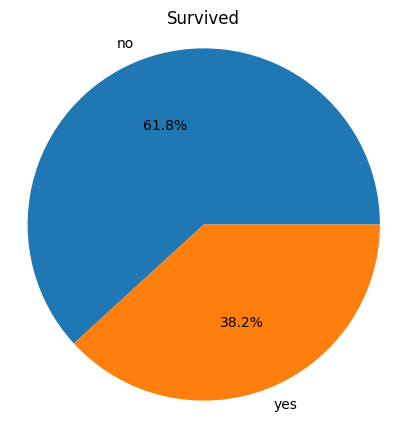

In [15]:
plot = pd.crosstab(index=titanic["survived"], columns="count").plot.pie(
    autopct="%1.1f%%", y="count", figsize=[5, 5], title="Survived", legend=False
)
plot.set_ylabel("")
plot.axis("equal")


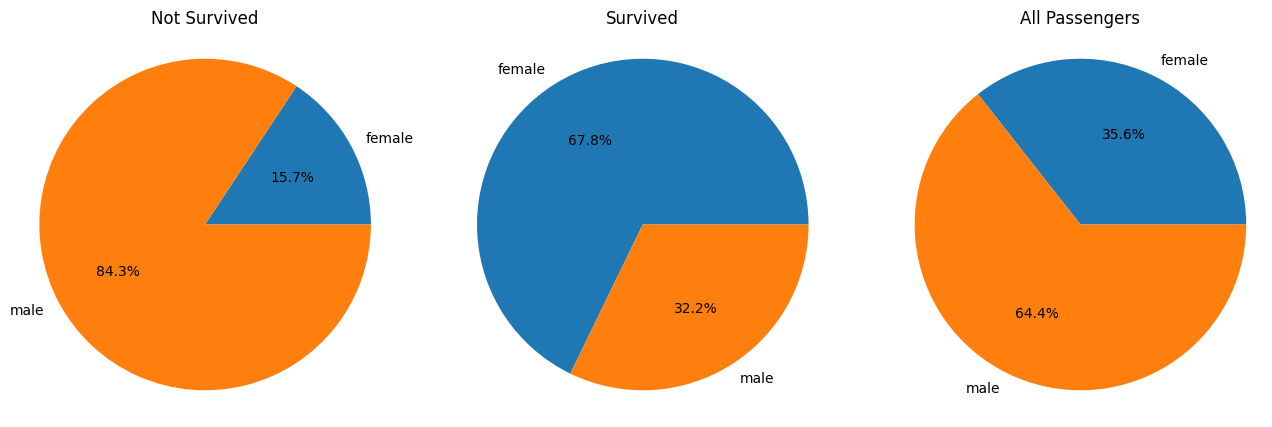

In [16]:
plots = (
    titanic_sex.div(titanic_sex["All"], axis=0)
    .transpose()[0:2]
    .plot.pie(
        figsize=[16, 5],
        subplots=True,
        legend=False,
        autopct="%1.1f%%",
        title=["Not Survived", "Survived", "All Passengers"],
    )
)
for plot in plots:
    plot.set_ylabel("")
    plot.axis("equal")


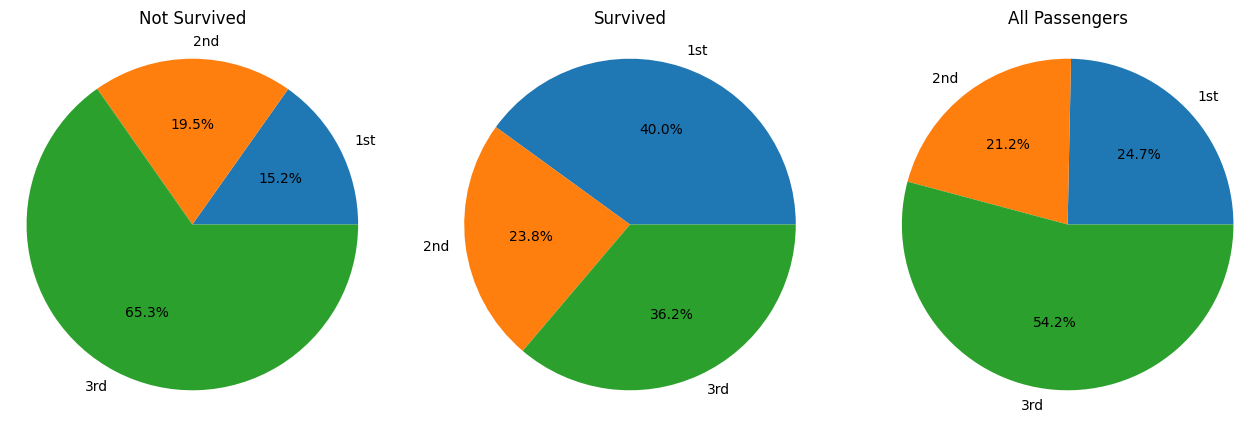

In [17]:
plots = (
    titanic_class.div(titanic_class["All"], axis=0)
    .transpose()[0:3]
    .plot.pie(
        title=["Not Survived", "Survived", "All Passengers"],
        figsize=[16, 5],
        subplots=True,
        legend=False,
        autopct="%1.1f%%",
    )
)
for plot in plots:
    plot.set_ylabel("")
    plot.axis("equal")


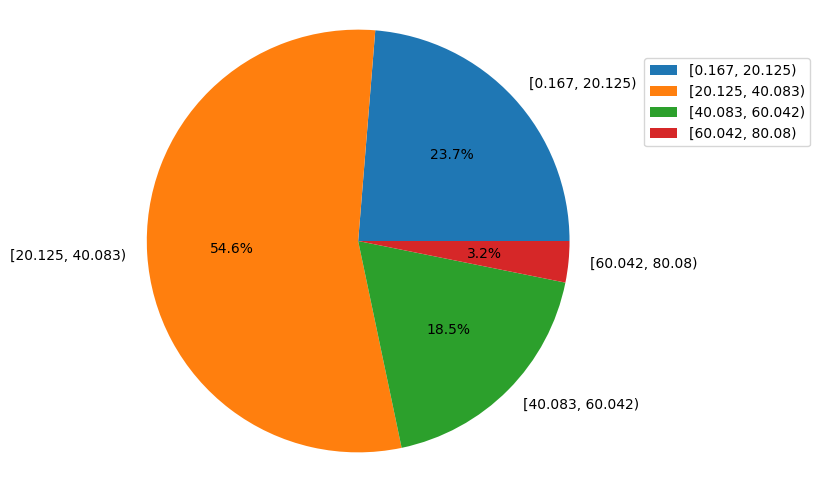

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você já tenha o DataFrame 'titanic' carregado com a coluna 'age'
s = titanic["age"].dropna().to_numpy()
out, bins = pd.cut(s, bins=4, include_lowest=True, right=False, retbins=True)

# Criação do gráfico de pizza
ax = out.value_counts().plot.pie(figsize=[6, 6], legend=True, autopct="%1.1f%%")

# Ajuste da legenda para a direita
plt.legend(loc="center left", bbox_to_anchor=(1.1, 0.8))

# Remoção do rótulo do eixo y
plt.ylabel("")

# Manter o gráfico como um círculo
plt.axis("equal")

# Exibição do gráfico
plt.show()



## Gráficos de Barras

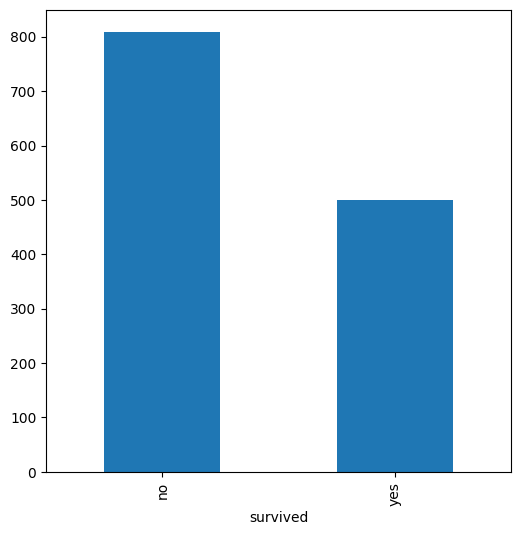

In [19]:
plot = pd.crosstab(index=titanic["survived"], columns="count").plot.bar(
    y="count", figsize=[6, 6], legend=False
)


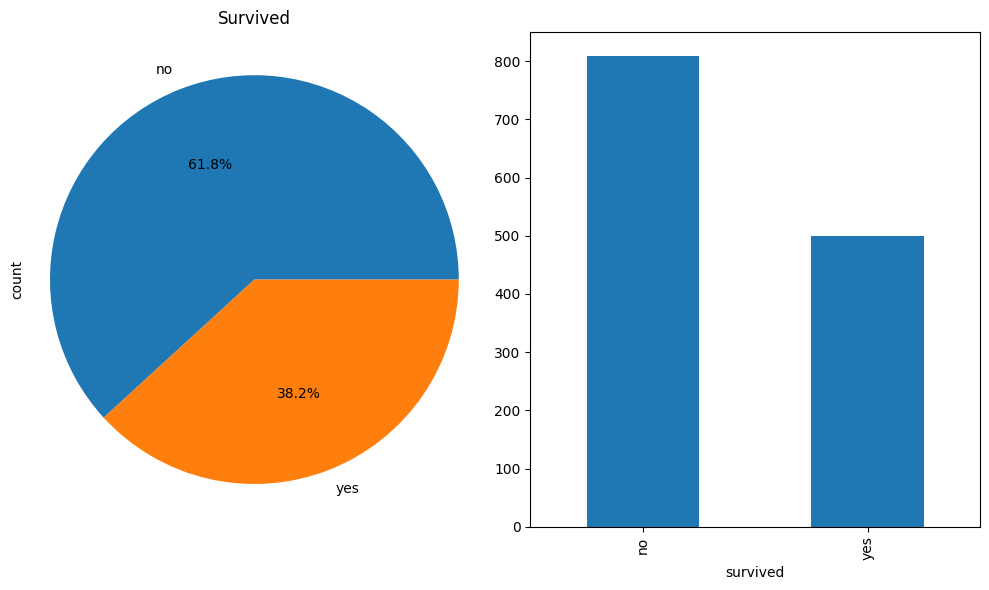

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
plot = pd.crosstab(index=titanic["survived"], columns="count").plot.pie(
    ax=axes[0], autopct="%1.1f%%", y="count", title="Survived", legend=False
)
plot.axis("equal")
pd.crosstab(index=titanic["survived"], columns="count").plot.bar(
    ax=axes[1], y="count", legend=False
)
fig.tight_layout()


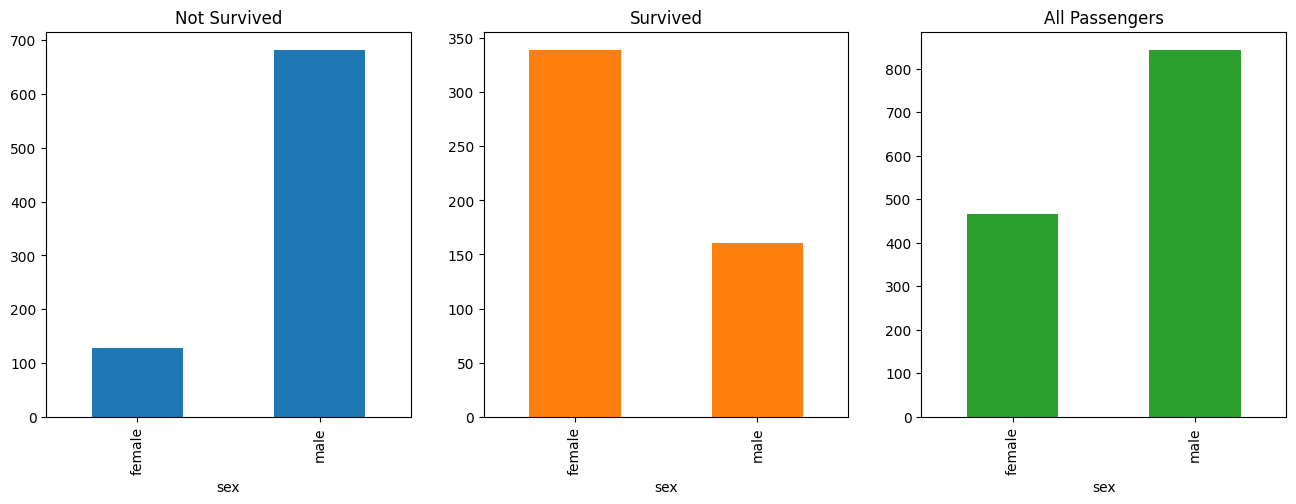

In [21]:
plots = titanic_sex.transpose()[0:2].plot.bar(
    figsize=[16, 5],
    subplots=True,
    legend=False,
    title=["Not Survived", "Survived", "All Passengers"],
    layout=(1, 3),
)


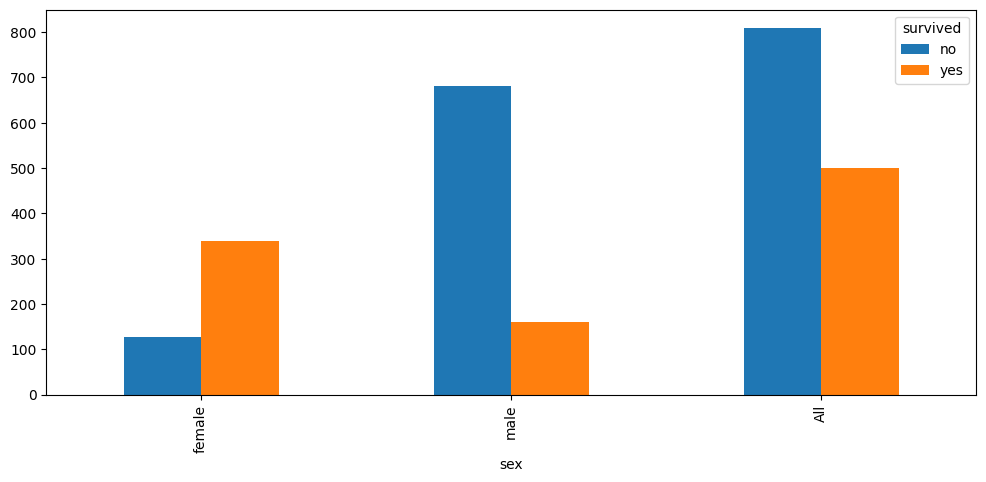

In [22]:
plots = titanic_sex[0:2].transpose()[0:3].plot.bar(figsize=[12, 5])


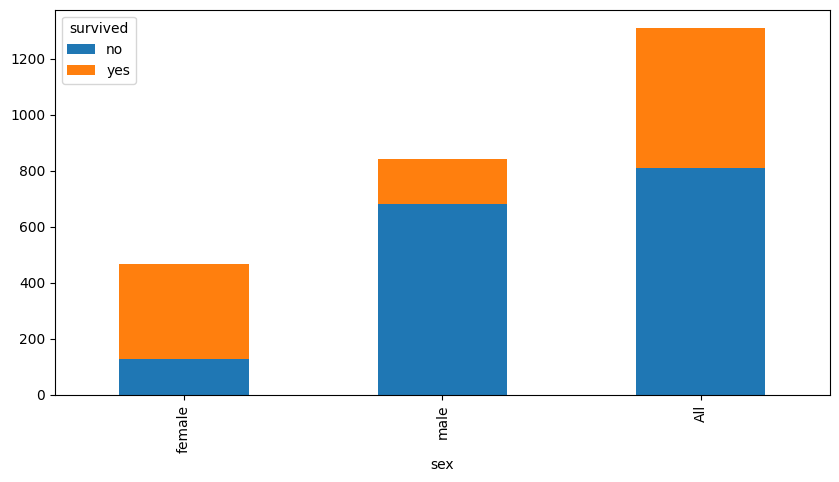

In [23]:
plots = titanic_sex[0:2].transpose()[0:3].plot.bar(figsize=[10, 5], stacked=True)


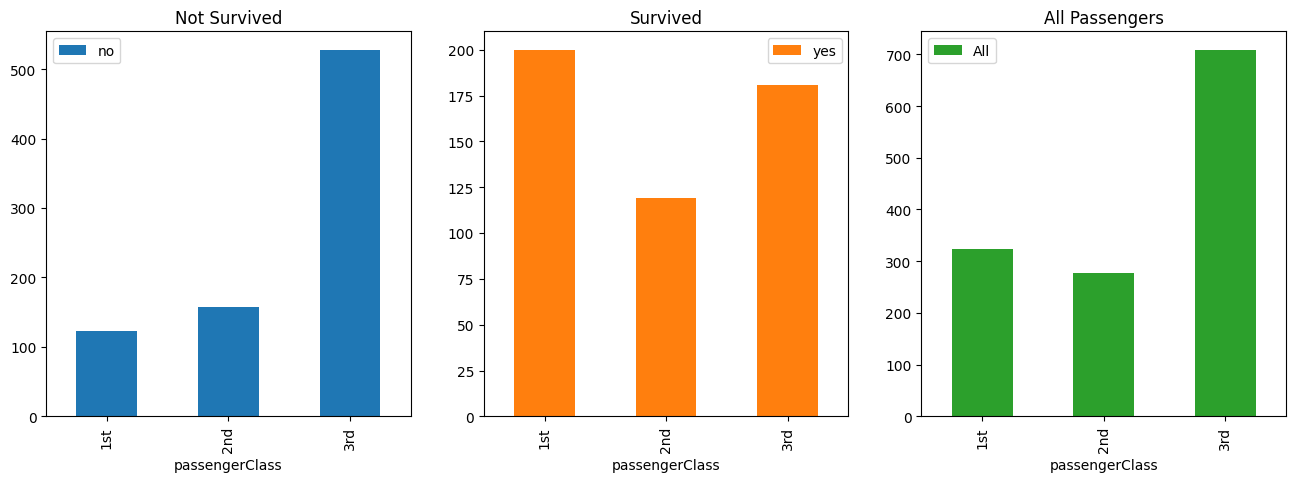

In [24]:
plots = titanic_class.transpose()[0:3].plot.bar(
    title=["Not Survived", "Survived", "All Passengers"],
    figsize=[16, 5],
    subplots=True,
    layout=(1, 3),
)


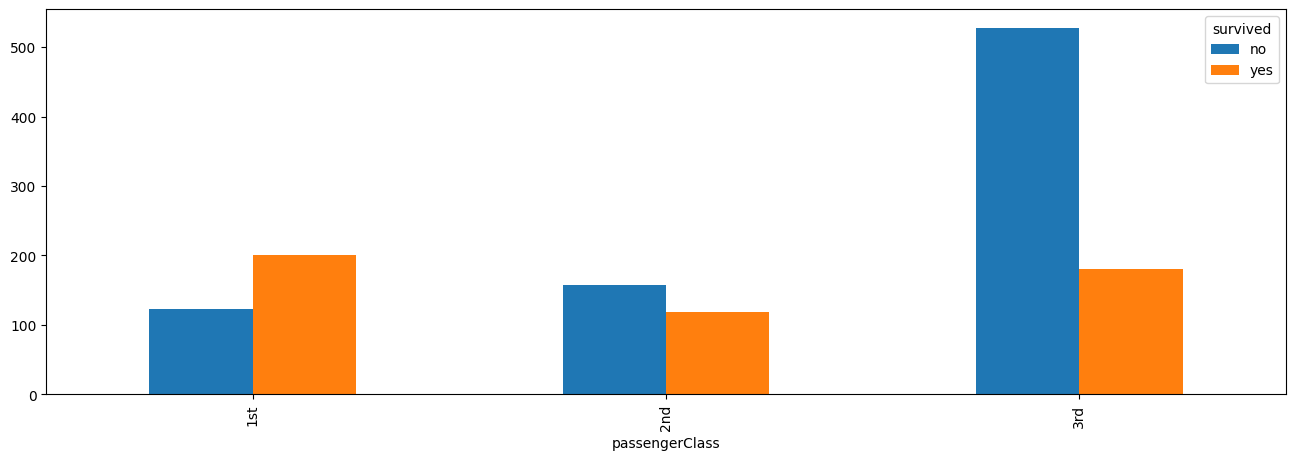

In [25]:
plots = titanic_class[0:2].transpose()[0:3].plot.bar(figsize=[16, 5])


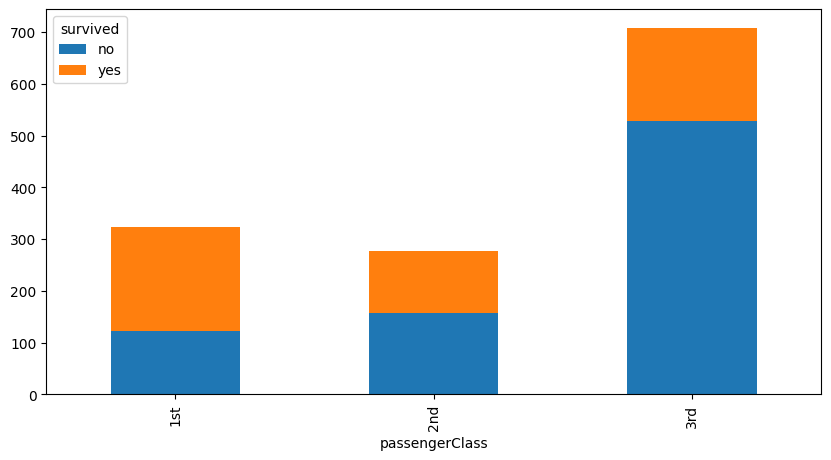

In [26]:
plots = titanic_class[0:2].transpose()[0:3].plot.bar(figsize=[10, 5], stacked=True)


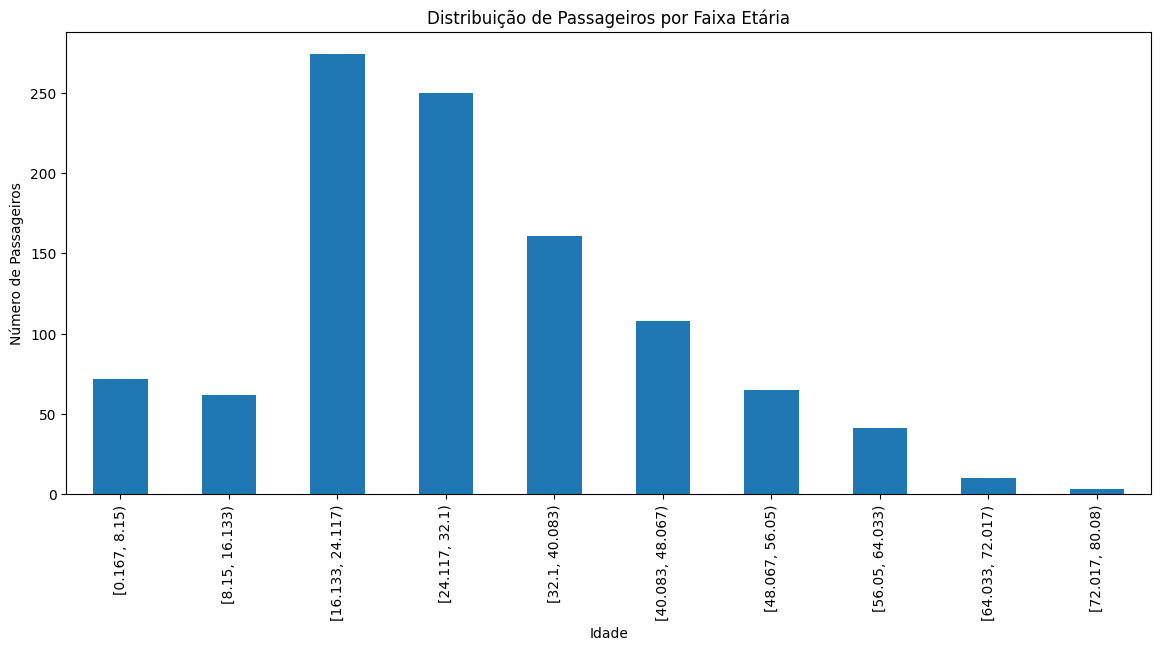

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Preparar os dados
s = titanic["age"].dropna().to_numpy()
out, bins = pd.cut(s, bins=10, include_lowest=True, right=False, retbins=True)

# Plotar o gráfico
plt.figure(figsize=[14, 6])
out.value_counts().plot.bar()

# Adicionar títulos aos eixos
plt.xlabel('Idade')
plt.ylabel('Número de Passageiros')
plt.title('Distribuição de Passageiros por Faixa Etária')

# Mostrar o gráfico
plt.show()


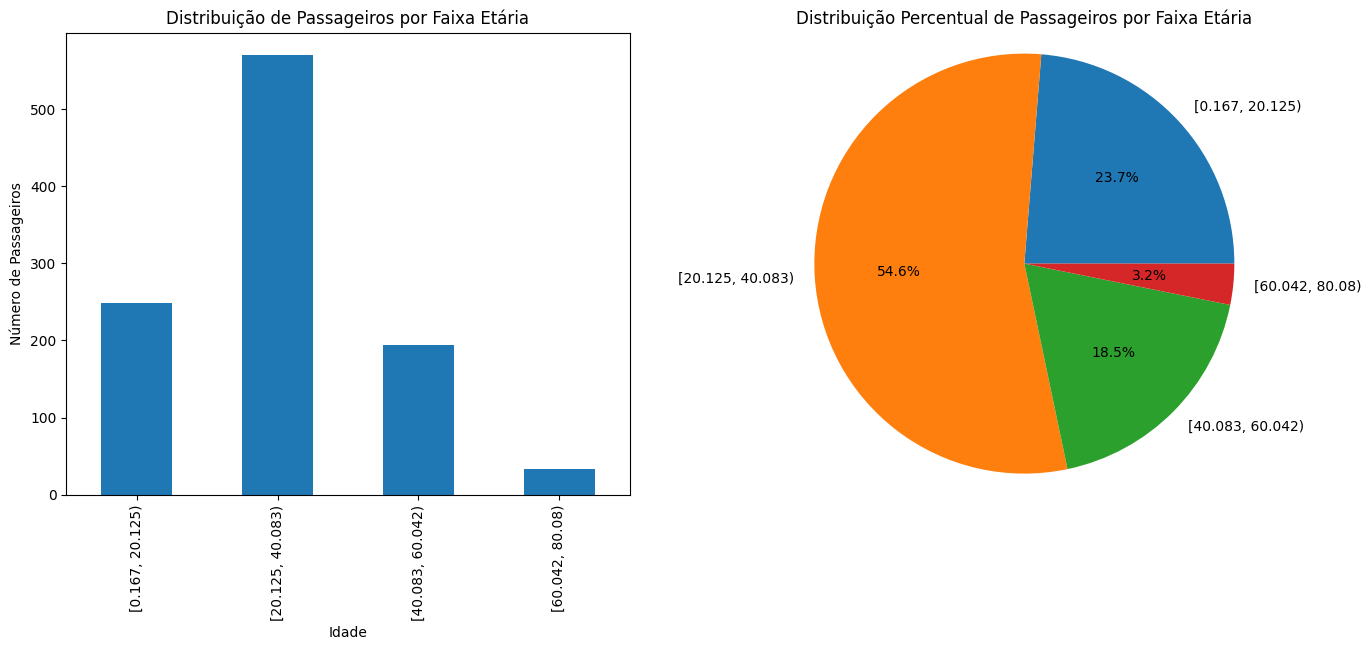

In [28]:
# Preparar os dados
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
n_bins = 4
s = titanic["age"].dropna().to_numpy()
out, bins = pd.cut(s, bins=n_bins, include_lowest=True, right=False, retbins=True)

# Plotar o gráfico de barras
out.value_counts().plot.bar(ax=axes[0])
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Número de Passageiros')
axes[0].set_title('Distribuição de Passageiros por Faixa Etária')

# Plotar o gráfico de pizza
out.value_counts().plot.pie(ax=axes[1], legend=False, autopct="%1.1f%%")
axes[1].set_ylabel('')
axes[1].set_title('Distribuição Percentual de Passageiros por Faixa Etária')
plt.axis("equal")

# Mostrar o gráfico
plt.show()


In [29]:
age_at_mar = data("openintro", "age_at_mar")
age_at_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5534 entries, 0 to 5533
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   rownames  5534 non-null   int64
 1   age       5534 non-null   int64
dtypes: int64(2)
memory usage: 86.6 KB


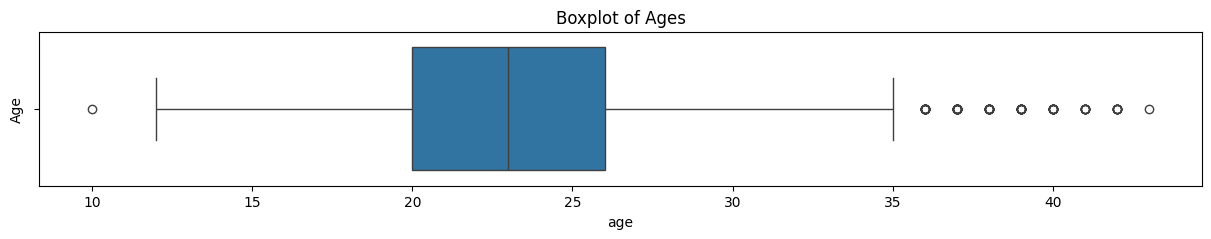

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have your DataFrame loaded
# df = pd.DataFrame({'rownames': range(5534), 'age': [insert_your_age_data_here]})

# For demonstration, let's create a sample DataFrame
data_age = age_at_mar

df = pd.DataFrame(data_age)

# Create the boxplot
plt.figure(figsize=(15, 2))
sns.boxplot(x='age', data=df)

# Customize the plot
plt.ylabel('Age')
plt.title('Boxplot of Ages')

# Show the plot
plt.show()


In [31]:
import pandas as pd

# Sample data
data_age = age_at_mar

df = pd.DataFrame(data_age)

# Quartile analysis
Q1 = df['age'].quantile(0.25)
Q2 = df['age'].median()  # Median (50th percentile)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]

# Printing results
print(f"First Quartile (Q1): {Q1}")
print(f"Median (Q2): {Q2}")
print(f"Third Quartile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Number of outliers: {outliers.shape[0]}")
print("Outliers:")
print(outliers)

# Additional summary statistics
summary_stats = df['age'].describe()
print("\nSummary Statistics:")
print(summary_stats)


First Quartile (Q1): 20.0
Median (Q2): 23.0
Third Quartile (Q3): 26.0
Interquartile Range (IQR): 6.0
Number of outliers: 96
Outliers:
      rownames  age
13          14   40
140        141   41
144        145   39
193        194   40
206        207   37
...        ...  ...
5143      5144   38
5148      5149   41
5250      5251   39
5321      5322   42
5487      5488   40

[96 rows x 2 columns]

Summary Statistics:
count    5534.000000
mean       23.440188
std         4.721365
min        10.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        43.000000
Name: age, dtype: float64


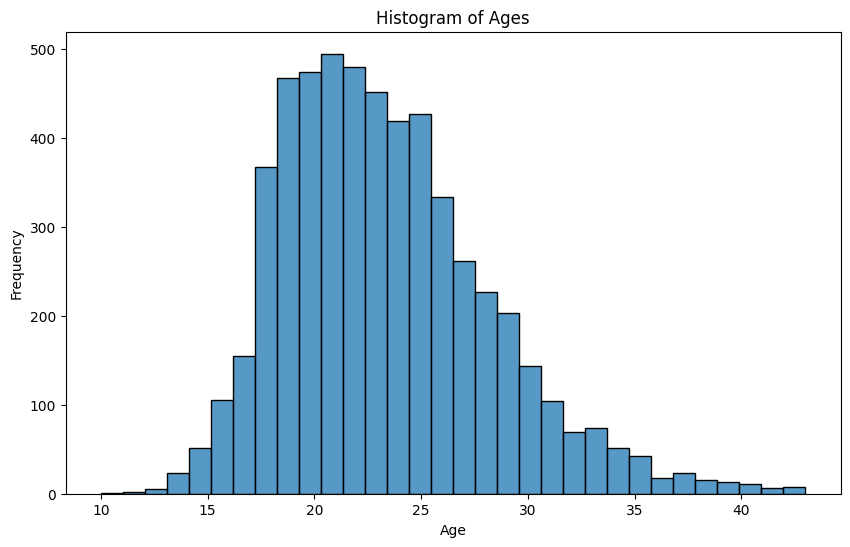

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For demonstration, let's create a sample DataFrame
data_age = age_at_mar

df = pd.DataFrame(data_age)

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=32, kde=False)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')

# Show the plot
plt.show()


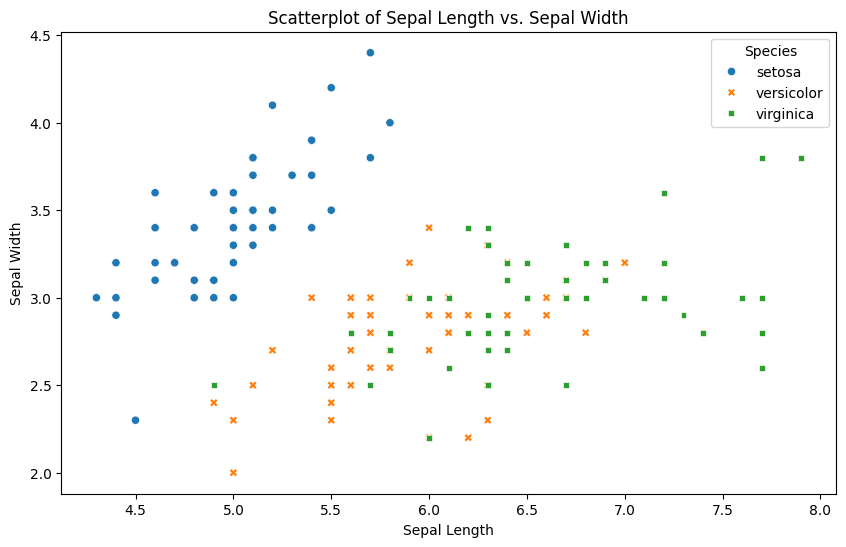

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar o dataset iris
data_iris = sm.datasets.get_rdataset("iris", "datasets", cache=True).data

# Criar o scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_iris, x='Sepal.Length', y='Sepal.Width', hue='Species', style='Species')

# Customizar o plot
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatterplot of Sepal Length vs. Sepal Width')

# Mostrar o plot
plt.show()


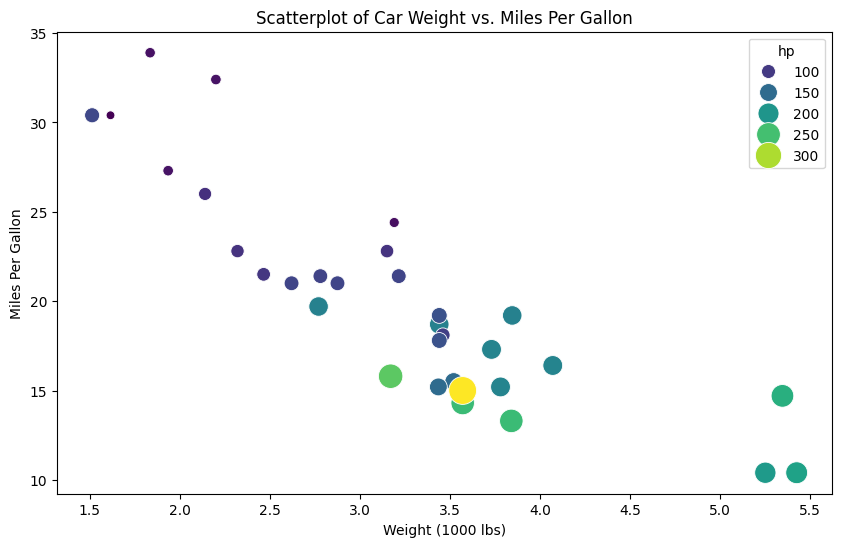

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar o dataset mtcars
data_car = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data

# Criar o scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_car, x='wt', y='mpg', hue='hp', size='hp', palette='viridis', sizes=(40, 400))

# Customizar o plot
plt.xlabel('Weight (1000 lbs)')
plt.ylabel('Miles Per Gallon')
plt.title('Scatterplot of Car Weight vs. Miles Per Gallon')

# Mostrar o plot
plt.show()


In [35]:
nile = data("datasets", "Nile")
nile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   rownames  100 non-null    int64
 1   time      100 non-null    int64
 2   value     100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


   rownames  time  value
0         1  1871   1120
1         2  1872   1160
2         3  1873    963
3         4  1874   1210
4         5  1875   1160


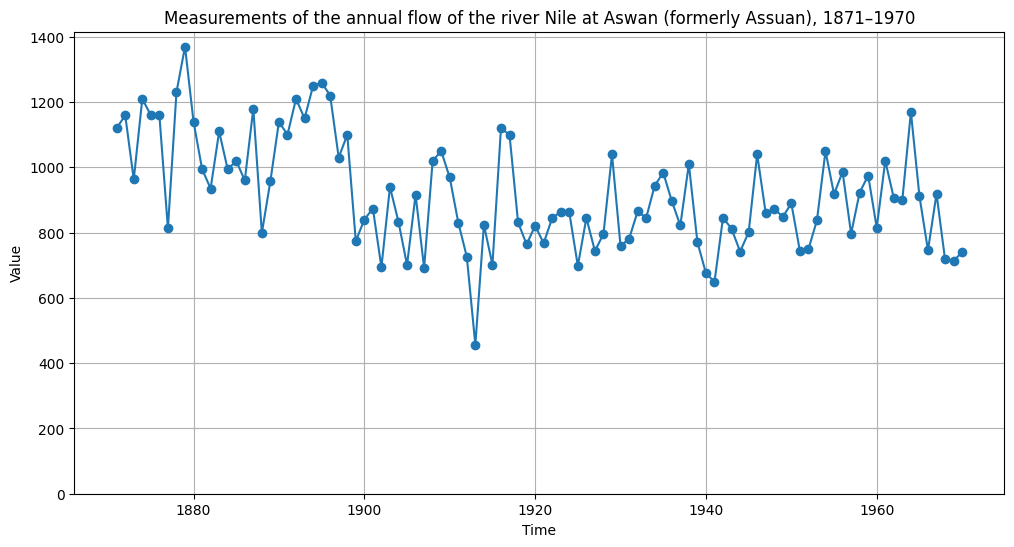

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

df = nile

# Verificar o DataFrame
print(df.head())

# Criar o gráfico de séries temporais
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['value'], marker='o')

# Customizar o gráfico
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Measurements of the annual flow of the river Nile at Aswan (formerly Assuan), 1871–1970')
plt.ylim(bottom=0)  
plt.grid(True)

# Mostrar o gráfico
plt.show()


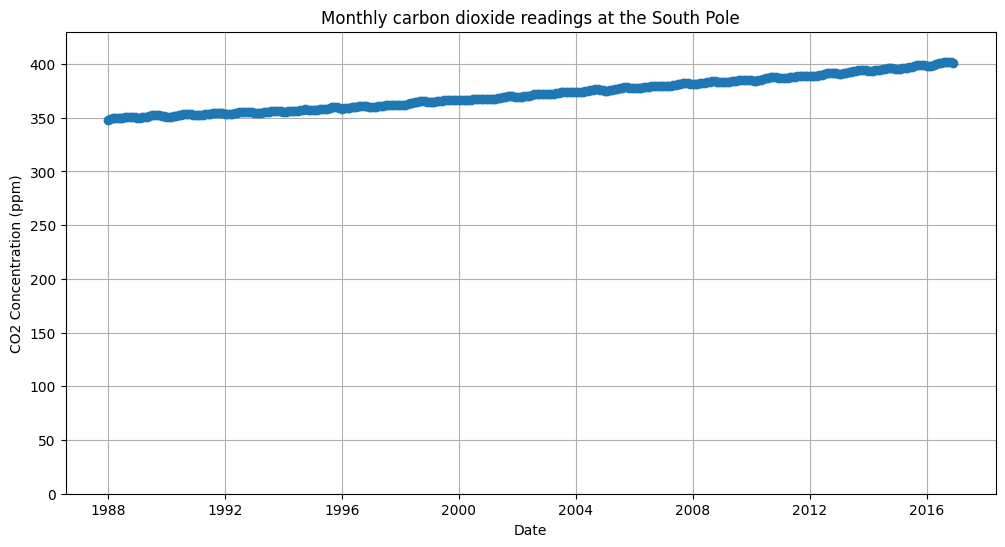

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

co2 = data("Stat2Data", "CO2SouthPole")

df = co2

# Converter ano e mês para uma coluna de data
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Plotar o gráfico de séries temporais
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['CO2'], marker='o', linestyle='-')

# Customizar o gráfico
plt.xlabel('Date')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Monthly carbon dioxide readings at the South Pole')
plt.ylim(bottom=0)  # Ajustar o eixo Y 
plt.ylim(top=430)  # Ajustar o eixo Y
plt.grid(True)

# Mostrar o gráfico
plt.show()
